First few rows of the dataset:


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB
None

Missing values per column:
Temperature                      0
Humidity                  

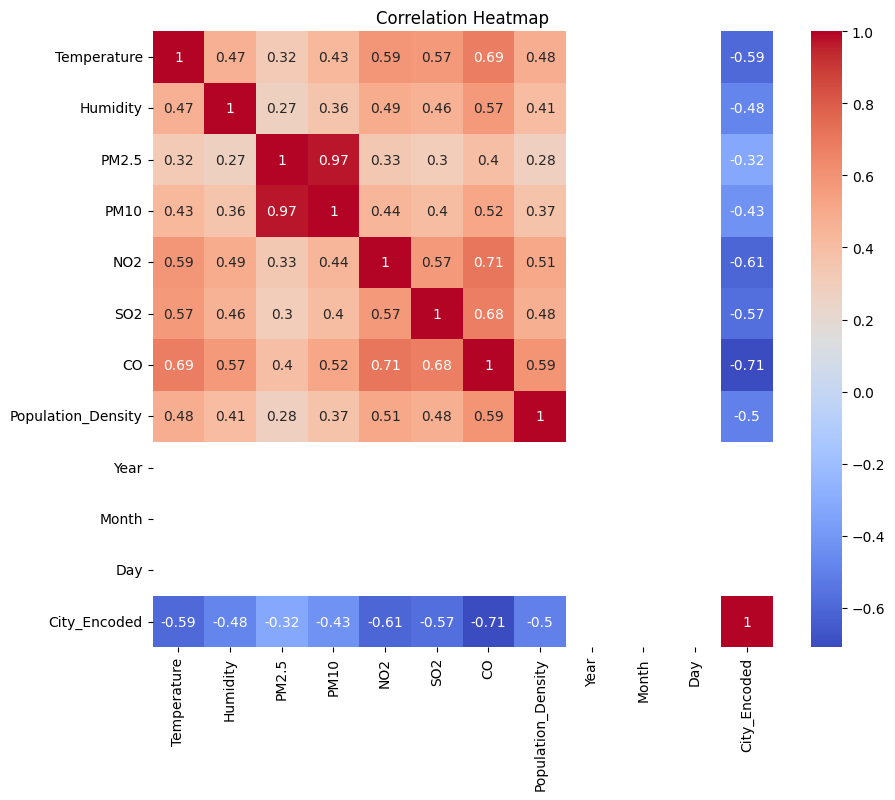

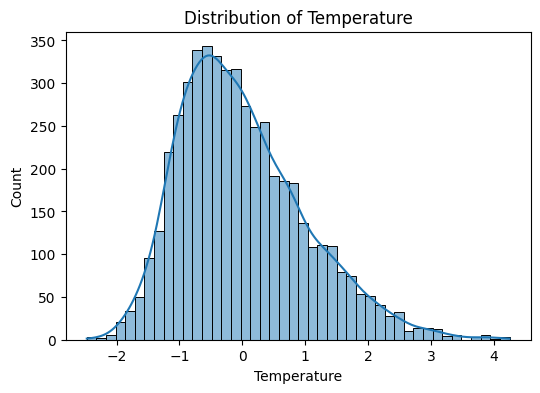

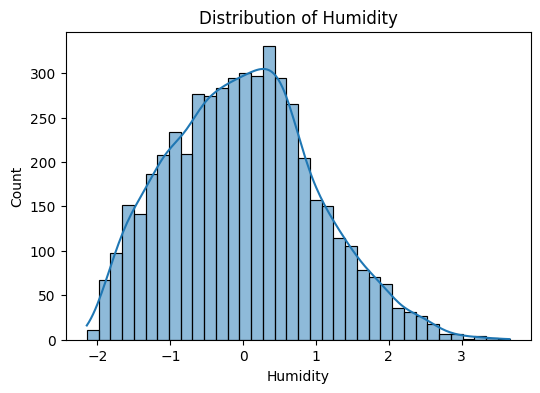

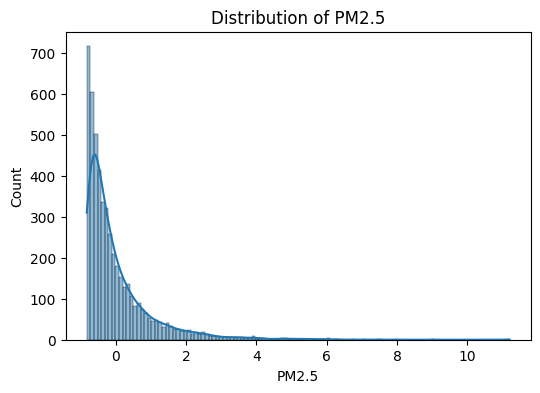

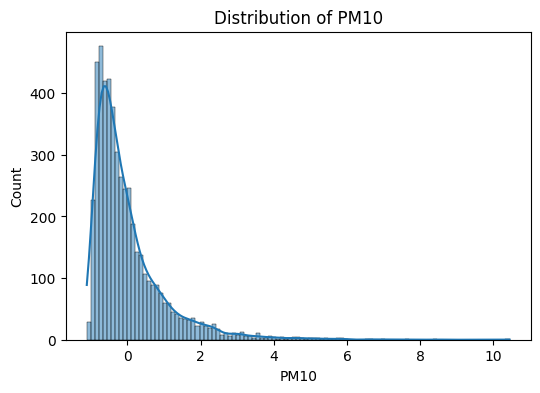

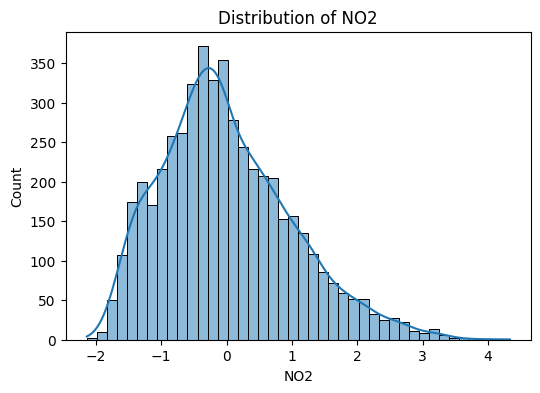

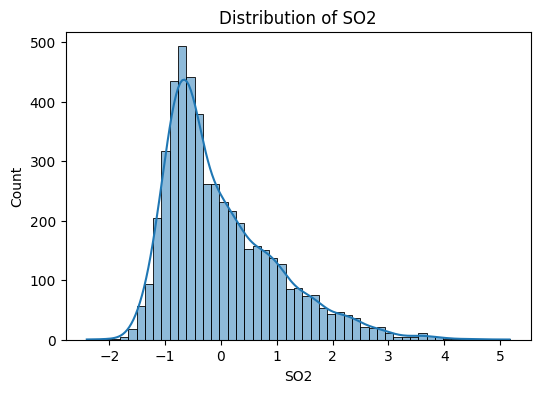

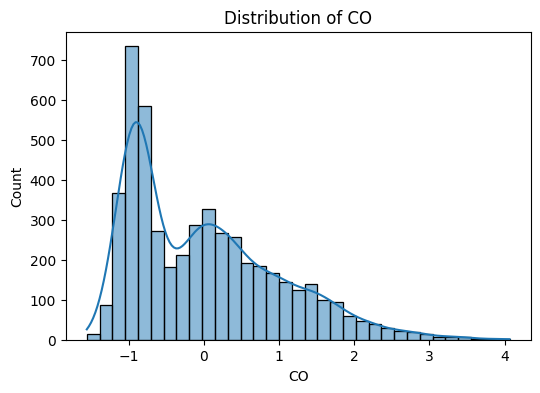


Linear Regression Evaluation Metrics:
Mean Squared Error: 0.03541491173480026
Mean Absolute Error: 0.1358703139118645
R² Score: 0.9578215612219558

Random Forest Regressor Evaluation Metrics:
Mean Squared Error: 0.03453119899317998
Mean Absolute Error: 0.1288364437011869
R² Score: 0.958874045103574


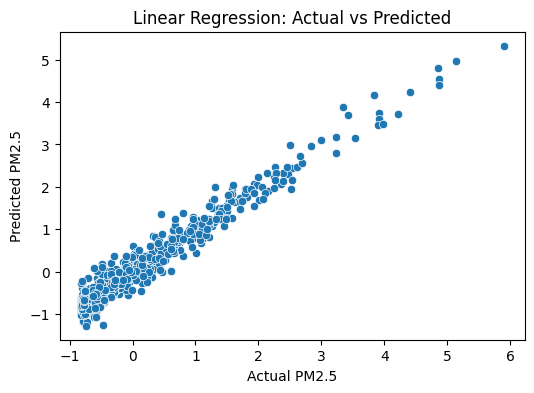

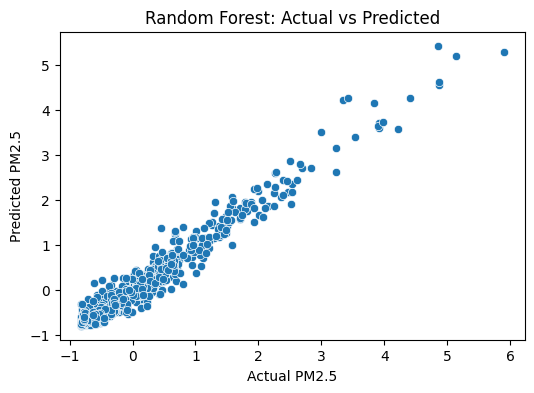

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the Dataset
df = pd.read_csv('air_pollution_dataset.csv')  # Replace with your actual file name
print("First few rows of the dataset:")
display(df.head())

# Dataset Information
print("\nDataset Info:")
print(df.info())

# Check for Missing Values
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop Missing Values
df.dropna(inplace=True)

# Summary statistics for numerical features
numerical_df = df.select_dtypes(include=['float64', 'int64'])
stats_summary = pd.DataFrame({
    'Mean': numerical_df.mean(),
    'Median': numerical_df.median(),
    'Variance': numerical_df.var(),
    'Standard Deviation': numerical_df.std()
})
print("\nSummary Statistics:\n", stats_summary)

# Convert 'Date' column to datetime format (if present)

df['Proximity_to_Industrial_Areas'] = pd.to_datetime(df['Proximity_to_Industrial_Areas'])
df['Year'] = df['Proximity_to_Industrial_Areas'].dt.year
df['Month'] = df['Proximity_to_Industrial_Areas'].dt.month
df['Day'] = df['Proximity_to_Industrial_Areas'].dt.day

# Encode Categorical Variables
le = LabelEncoder()
df['City_Encoded'] = le.fit_transform(df['Proximity_to_Industrial_Areas'])

# Feature Scaling
numerical_features = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO']  
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Correlation Matrix (only numerical features)
numeric_df = df.select_dtypes(include=['number'])  # Select only numeric columns

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Distribution Plots
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Define Features (X) and Target (y)
X = df[['PM10', 'NO2', 'SO2', 'CO', 'City_Encoded', 'Year', 'Month', 'Day']]
y = df['PM2.5']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Evaluation Function
def evaluate_model(true, preds, name):
    mse = mean_squared_error(true, preds)
    mae = mean_absolute_error(true, preds)
    r2 = r2_score(true, preds)
    print(f"\n{name} Evaluation Metrics:")
    print(f"Mean Squared Error: {mse}")
    print(f"Mean Absolute Error: {mae}")
    print(f"R² Score: {r2}")

# Evaluate Models
evaluate_model(y_test, lr_preds, "Linear Regression")
evaluate_model(y_test, rf_preds, "Random Forest Regressor")

# Plot Predictions
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=lr_preds)
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Linear Regression: Actual vs Predicted")
plt.show()

plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=rf_preds)
plt.xlabel("Actual PM2.5")
plt.ylabel("Predicted PM2.5")
plt.title("Random Forest: Actual vs Predicted")
plt.show()

# Save cleaned dataset
df.to_csv("cleaned_pollution_dataset.csv", index=False)
